In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
datasets = {
    "fetal_head": {
        "name": "Fetal head",
        "path": "fetal_head.csv",
    },
    "fetal_head_2": {
        "name": "Fetal head 2",
        "path": "fetal_head_2.csv",
    },
    "kidneys": {
        "name": "Kidneys",
        "path": "kidneys.csv",
    },
    "lungs": {
        "name": "Lungs",
        "path": "lungs.csv",
    },
    "nerve": {
        "name": "Nerve",
        "path": "nerve.csv",
    },
    "thyroid": {
        "name": "Thyroid",
        "path": "thyroid.csv",
    },
    "shapes_a": {
        "name": "Shapes A",
        "path": "shapes_a.csv",
    },
    "shapes_b": {
        "name": "Shapes B",
        "path": "shapes_b.csv",
    },
}

repr_datasets = datasets.copy()
del repr_datasets["shapes_a"]
del repr_datasets["shapes_b"]
del repr_datasets["lungs"]

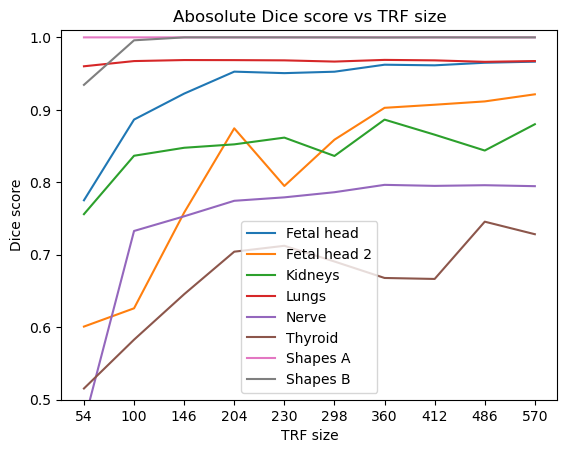

In [3]:
for dataset in datasets.keys():
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]

    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])

    plt.plot(df["trf_size"], df["dice_score"], label=name)
    plt.ylim(0.5, 1.01)
    plt.xlabel("TRF size")
    plt.ylabel("Dice score")

plt.title("Abosolute Dice score vs TRF size")
plt.legend()
plt.show()

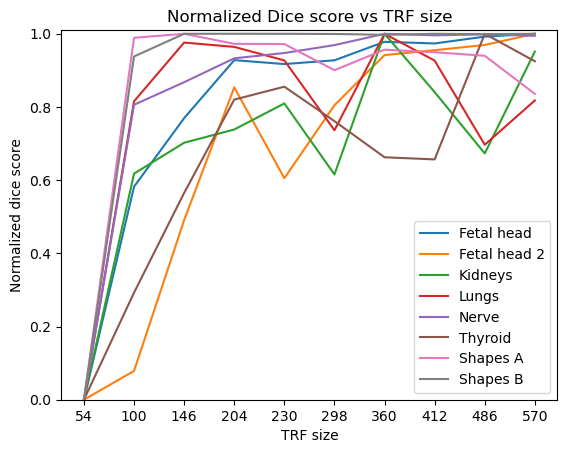

In [4]:
# normalized between 0 and 1 dice score
for dataset in datasets.keys():
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]

    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])

    df["dice_score_norm"] = (df["dice_score"] - df["dice_score"].min()) / (df["dice_score"].max() - df["dice_score"].min())

    plt.plot(df["trf_size"], df["dice_score_norm"], label=name)
    plt.ylim(0, 1.01)
    plt.xlabel("TRF size")
    plt.ylabel("Normalized dice score")

plt.title("Normalized Dice score vs TRF size")
plt.legend()
plt.show()

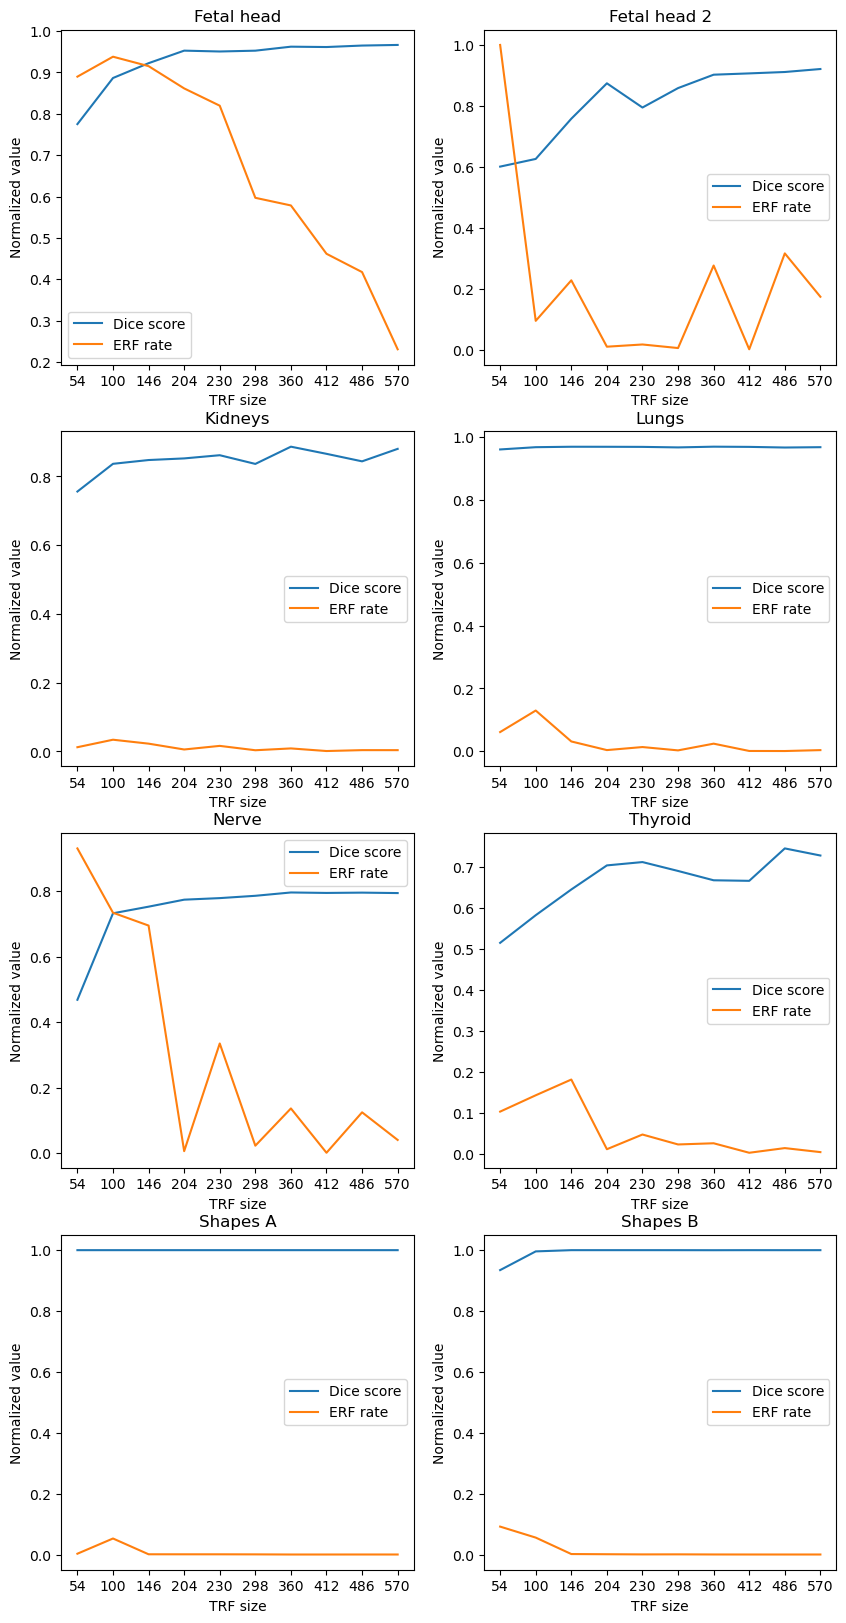

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for i, dataset in enumerate(datasets.keys()):
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])

    # plot trf vs dice score, trf vs object rate and trf vs erf rate
    axs[i // 2, i % 2].plot(df["trf_size"], df["dice_score"], label="Dice score")
    # axs[i // 2, i % 2].plot(df["trf_size"], df["object_rate"], label="Object rate")
    axs[i // 2, i % 2].plot(df["trf_size"], df["erf_rate"], label="ERF rate")
    # axs[i // 2, i % 2].set_ylim(0, 1.01)
    # axs[i // 2, i % 2].set_yscale("log")
    axs[i // 2, i % 2].set_xlabel("TRF size")
    axs[i // 2, i % 2].set_ylabel("Normalized value")
    axs[i // 2, i % 2].set_title(name)
    axs[i // 2, i % 2].legend()

plt.show()


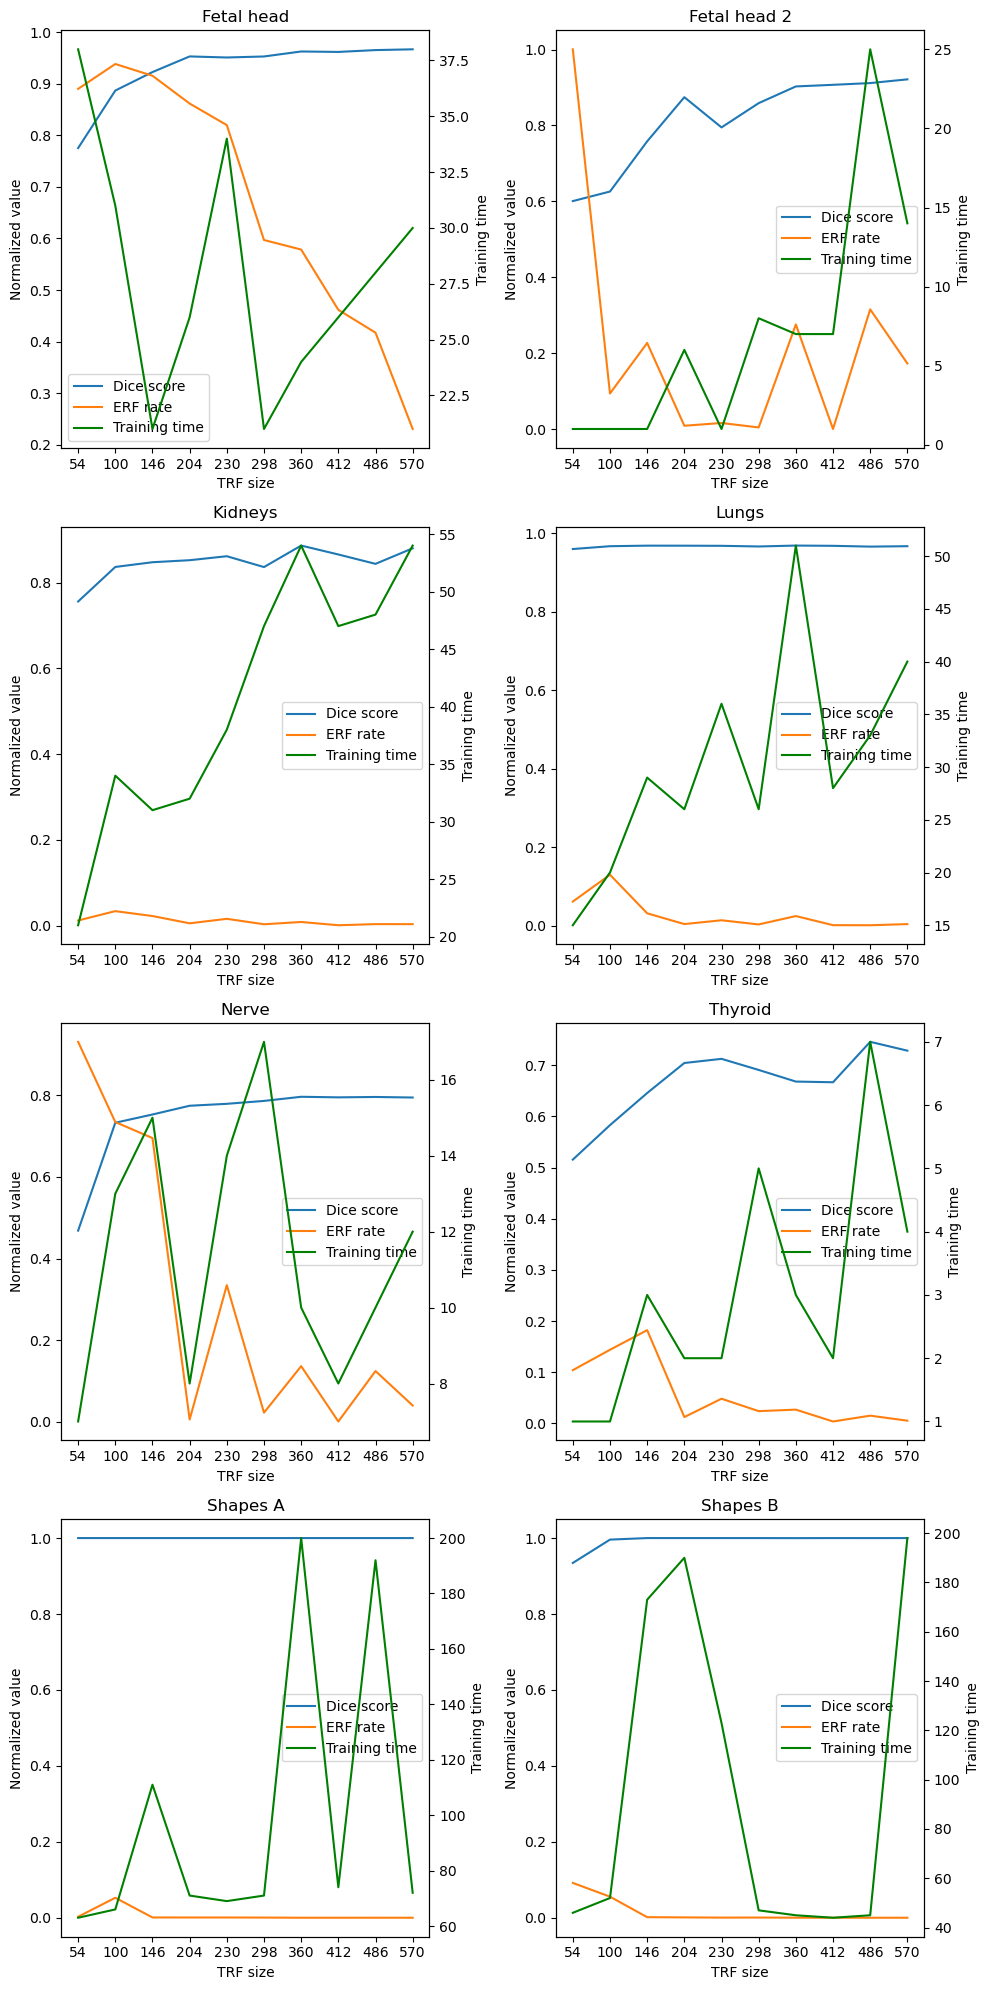

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for i, dataset in enumerate(datasets.keys()):
    name = datasets[dataset]["name"]
    path = datasets[dataset]["path"]
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0])

    # plot trf vs dice score, trf vs object rate and trf vs erf rate
    ax_left = axs[i // 2, i % 2]
    ax_left.plot(df["trf_size"], df["dice_score"], label="Dice score")
    ax_left.plot(df["trf_size"], df["erf_rate"], label="ERF rate")
    
    ax_right = ax_left.twinx()
    ax_right.plot(df["trf_size"], df["training_time"], label="Training time", color="green")
    ax_right.set_ylabel("Training time")
    ax_left.set_xlabel("TRF size")
    ax_left.set_ylabel("Normalized value")
    ax_left.set_title(name)
    
    lines, labels = ax_left.get_legend_handles_labels()
    lines2, labels2 = ax_right.get_legend_handles_labels()
    ax_left.legend(lines + lines2, labels + labels2, loc=0)

fig.tight_layout()
plt.show()


In [7]:
# mean of all representative datasets
df_mean = None
n_datasets = 0
for dataset in repr_datasets.keys():

    n_datasets += 1

    path = datasets[dataset]["path"]
    df = pd.read_csv(path, delimiter="\t").T.reset_index()
    df = df.rename(columns=df.iloc[0]).drop(df.index[0]).astype(float)
    df_np = df.to_numpy()
    if df_mean is None:
        df_mean = df_np
    else:
        df_mean += df_np

df_mean /= n_datasets
df_mean = pd.DataFrame(df_mean, columns=df.columns)
df_mean

,trf_size,training_time,erf_rate_before_training,erf_rate,dice_score,object_rate,accuracy,sensitivity,specificity,jaccard_score
0,54.0,13.6,0.129154,0.587587,0.623221,30.518038,0.957659,0.721485,0.964616,0.504257
1,100.0,16.0,0.036007,0.389000,0.733017,7.629509,0.954901,0.810682,0.964196,0.624682
2,146.0,14.2,0.026212,0.408604,0.785382,3.390893,0.966713,0.833601,0.973246,0.689378
3,204.0,14.8,0.008689,0.178951,0.831666,1.827076,0.977702,0.854846,0.984900,0.749695
4,230.0,17.8,0.021866,0.247141,0.819782,1.220722,0.972406,0.852696,0.977477,0.733728
5,298.0,19.6,0.006683,0.130412,0.824968,0.812034,0.977081,0.871545,0.980200,0.745602
6,360.0,19.6,0.016344,0.205337,0.843211,0.498273,0.981117,0.871708,0.985485,0.769737
7,412.0,18.0,0.001777,0.093707,0.839186,0.447203,0.980994,0.875601,0.986093,0.763944
8,486.0,23.6,0.006308,0.175368,0.852429,0.292332,0.981978,0.873112,0.987972,0.777323
9,570.0,22.8,0.005208,0.090699,0.858223,0.203008,0.982667,0.874747,0.988190,0.784177


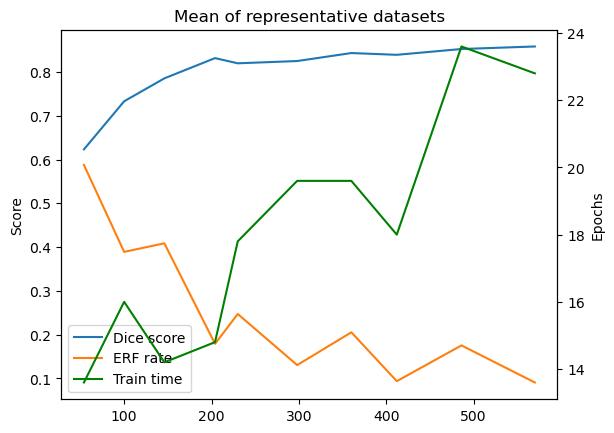

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df_mean["trf_size"], df_mean["dice_score"], label="Dice score")
ax1.plot(df_mean["trf_size"], df_mean["erf_rate"], label="ERF rate")
ax2.plot(df_mean["trf_size"], df_mean["training_time"], label="Train time", color="green")


ax1.set_ylabel("Score")
ax2.set_ylabel("Epochs")


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.xlabel("TRF size")
plt.title("Mean of representative datasets")
plt.show()